                                            Ames Housing dataset

            Predicting sales prices and practicing feature engineering, RFs, and gradient boosting

Imports and reading data:

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [287]:
df=pd.read_csv('train.csv')


In [288]:
test=pd.read_csv('test.csv')

In [289]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Data exploration:

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [291]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [292]:
df.corr().loc['SalePrice'][:-1].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
Name: SalePrice, dtype: float64

(array([ 5.,  0.,  5.,  6.,  6.,  7., 32., 29., 23., 35., 59., 67., 73.,
        92., 89., 91., 62., 60., 57., 73., 67., 54., 45., 33., 30., 31.,
        31., 33., 26., 23., 17., 19., 18., 18., 14., 11.,  5.,  8., 13.,
        12., 10.,  6.,  6.,  5.,  1.,  3.,  5.,  6.,  5.,  4.,  3.,  2.,
         3.,  1.,  3.,  1.,  2.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 34900.,  42101.,  49302.,  56503.,  63704.,  70905.,  78106.,
         85307.,  92508.,  99709., 106910., 114111., 121312., 128513.,
        135714., 142915., 150116., 157317., 164518., 171719., 178920.,
        186121., 193322., 200523., 207724., 214925., 222126., 229327.,
        236528., 243729., 250930., 258131., 265332., 272533., 279734.,
        286935., 294136., 301337., 308538., 315739., 322940., 330141.,
        

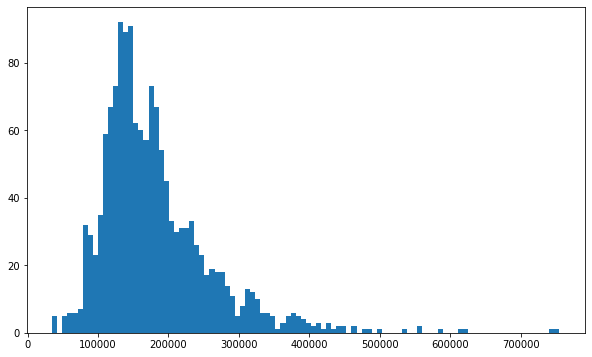

In [293]:
plt.figure(figsize=(10,6))
plt.hist(df['SalePrice'], bins=100)

Data cleaning:

In [294]:
df = pd.concat((df, test), sort=False).reset_index(drop=True)

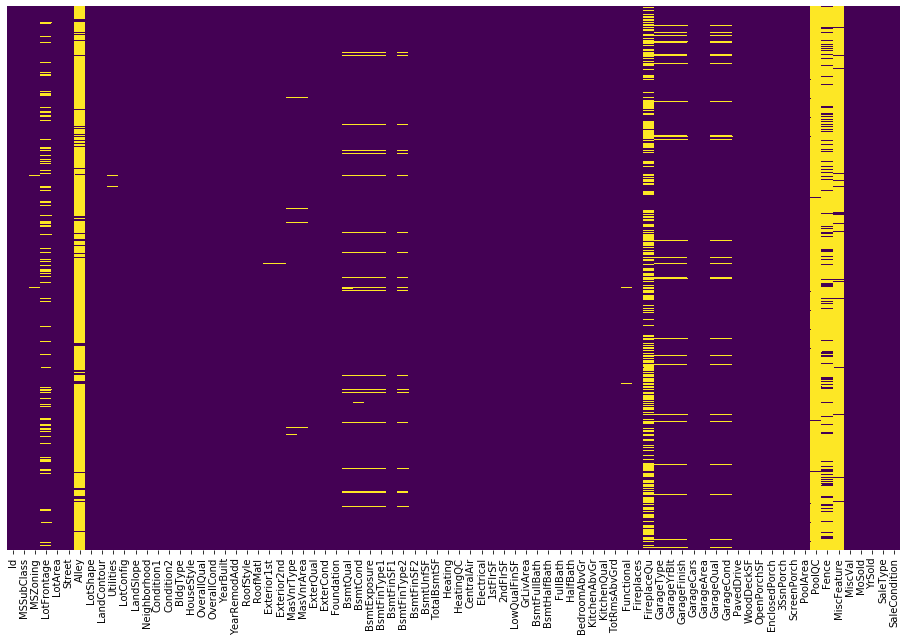

In [295]:
plt.figure(figsize=(16,10))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

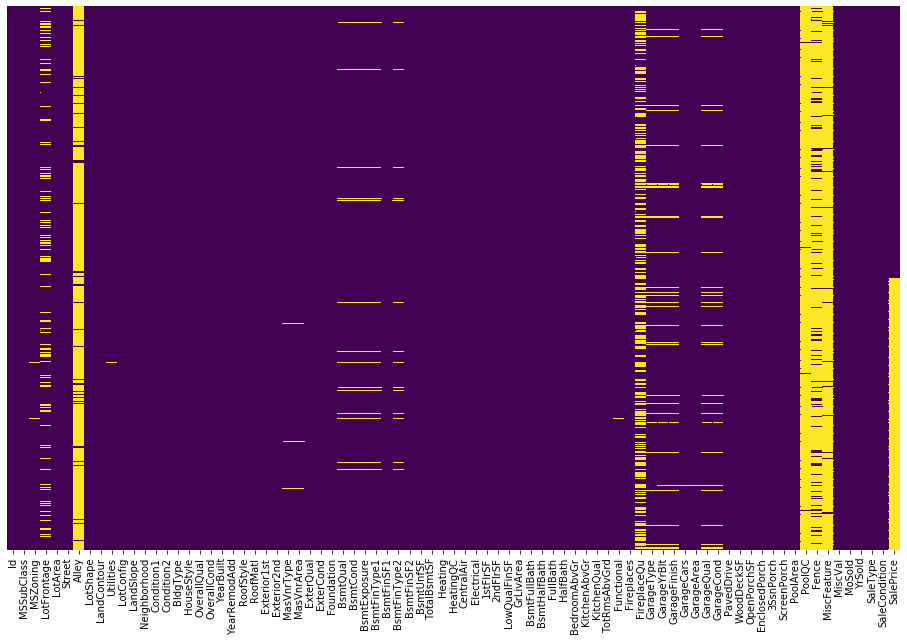

In [296]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

LotFrontage: Linear feet of street connected to property

In [297]:
df.corr().loc['LotFrontage'].sort_values()[:-1]

MSSubClass      -0.417359
OverallCond     -0.075508
Id              -0.027549
BsmtHalfBath    -0.025629
YrSold          -0.007917
KitchenAbvGr     0.004676
LowQualFinSF     0.004894
MoSold           0.011254
EnclosedPorch    0.011509
2ndFlrSF         0.026545
3SsnPorch        0.028289
HalfBath         0.039452
MiscVal          0.044272
BsmtFinSF2       0.047431
ScreenPorch      0.075858
GarageYrBlt      0.076673
YearRemodAdd     0.091557
BsmtFullBath     0.113245
BsmtUnfSF        0.113714
WoodDeckSF       0.122070
YearBuilt        0.122811
OpenPorchSF      0.164896
PoolArea         0.174119
FullBath         0.181668
OverallQual      0.217645
BsmtFinSF1       0.219408
MasVnrArea       0.221079
BedroomAbvGr     0.234892
Fireplaces       0.261970
GarageCars       0.310587
TotRmsAbvGrd     0.349513
SalePrice        0.351799
TotalBsmtSF      0.354822
GarageArea       0.359786
GrLivArea        0.382462
1stFlrSF         0.458247
LotArea          0.489896
Name: LotFrontage, dtype: float64

Correlated with 1stFlrSF: First Floor square feet

In [298]:
lotfrontagecalc=df[['LotFrontage', '1stFlrSF']].dropna()

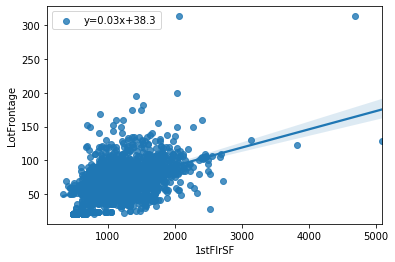

In [299]:
slope, intercept, r_value, p_value, std_err = stats.linregress(lotfrontagecalc['1stFlrSF'],lotfrontagecalc['LotFrontage'])
sns.regplot(x='1stFlrSF', y='LotFrontage', data=lotfrontagecalc, 
 label="y={0:.2f}x+{1:.1f}".format(slope, intercept)).legend(loc="best")

In [300]:
stats.linregress(lotfrontagecalc['1stFlrSF'], lotfrontagecalc['LotFrontage'])

LinregressResult(slope=0.026892320561333168, intercept=38.29120144715462, rvalue=0.4582474665823353, pvalue=1.3156806813593237e-126, stderr=0.0010579175411813975)

In [301]:
def fill_lotfrontage(x):
    LotFrontage=x[0]
    stFlrSF=x[1]
    
    if pd.isnull(LotFrontage):
        return 0.028743*stFlrSF+36.75
    else:
        return LotFrontage
    
    
    
    

In [302]:
#lottest=test[['LotFrontage', '1stFlrSF']].dropna()
#stats.linregress(lottest['1stFlrSF'], lottest['LotFrontage'])

In [303]:
#def fill_lottest(x):
    #LotFrontage=x[0]
   # stFlrSF=x[1]
    
    #if pd.isnull(LotFrontage):
       # return 0.02524*stFlrSF+39.59
    #else:
       # return LotFrontage
    

In [304]:
df['LotFrontage']=df[['LotFrontage','1stFlrSF']].apply(fill_lotfrontage, axis=1)
#test['LotFrontage']=df[['LotFrontage', '1stFlrSF']].apply(fill_lottest, axis=1)

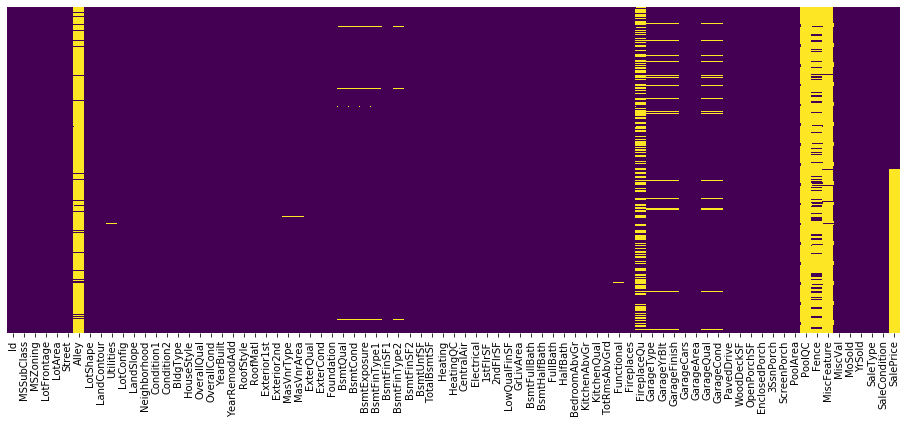

In [305]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Too much data is missing:
- Alley: Type of alley access
- FireplaceQu: Fireplace quality
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories


In [306]:
df['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

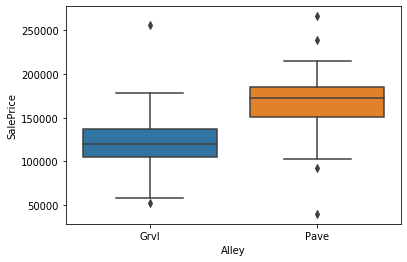

In [307]:
sns.boxplot(y='SalePrice', x='Alley', data=df)

In [308]:
df['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

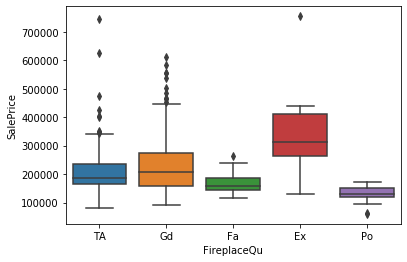

In [309]:
sns.boxplot(x='FireplaceQu', y='SalePrice', data=df)

In [310]:
df['PoolQC'].value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [311]:
df['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

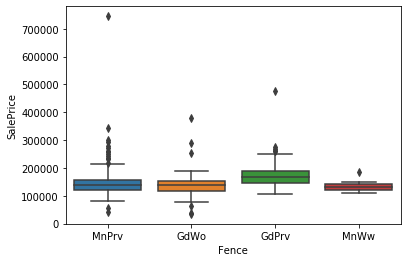

In [312]:
sns.boxplot(x='Fence', y='SalePrice', data=df)

In [313]:
df['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

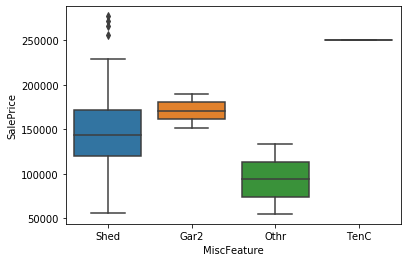

In [314]:
sns.boxplot(x='MiscFeature', y='SalePrice', data=df)

In [315]:
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [316]:
#test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

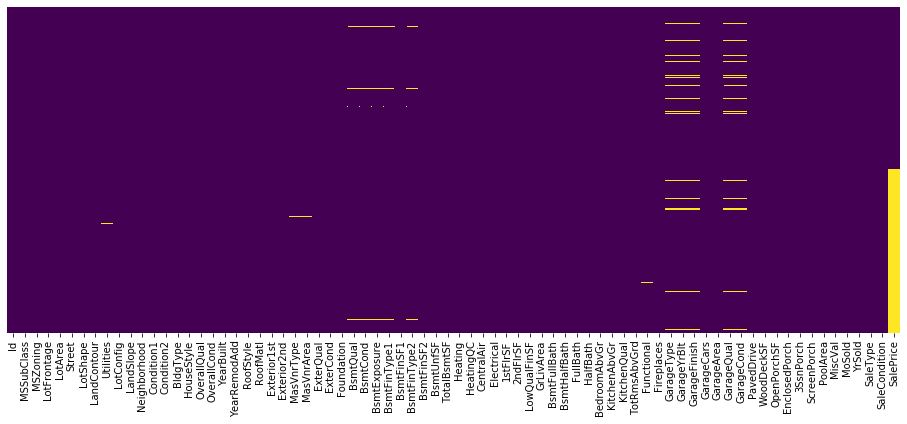

In [317]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Information about the Garage will is missing, when there is no Garage (in 81 cases), so we can replace nan with a new category or 0 for year
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition

In [318]:
df['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [319]:
df[['GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isna().sum()

GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageQual      159
GarageCond      159
dtype: int64

In [320]:
df[df['GarageArea']==0][['GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2893,NaN,NaN,NaN,NaN,NaN
2909,NaN,NaN,NaN,NaN,NaN
2913,NaN,NaN,NaN,NaN,NaN
2914,NaN,NaN,NaN,NaN,NaN


In [321]:
df['GarageCond'].value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [322]:
def fill_garage(x):
    
    if pd.isnull(x):
        return 'NoGarage'
    else:
        return x

In [323]:
df['GarageType']=df['GarageType'].apply(fill_garage)
df['GarageFinish']=df['GarageFinish'].apply(fill_garage)
df['GarageQual']=df['GarageQual'].apply(fill_garage)
df['GarageCond']=df['GarageCond'].apply(fill_garage)

In [324]:
#test['GarageType']=test['GarageType'].apply(fill_garage)
#test['GarageFinish']=test['GarageFinish'].apply(fill_garage)
#test['GarageQual']=test['GarageQual'].apply(fill_garage)
#test['GarageCond']=test['GarageCond'].apply(fill_garage)

In [325]:
def fill_garageyr(x):
    
    if pd.isnull(x):
        return 0
    else:
        return x

In [326]:
df['GarageYrBlt']=df['GarageYrBlt'].apply(fill_garageyr)

In [327]:
#test['GarageYrBlt']=test['GarageYrBlt'].apply(fill_garageyr)

In [328]:
df[df['GarageArea']==0][['GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NoGarage,0.0,NoGarage,NoGarage,NoGarage
48,NoGarage,0.0,NoGarage,NoGarage,NoGarage
78,NoGarage,0.0,NoGarage,NoGarage,NoGarage
88,NoGarage,0.0,NoGarage,NoGarage,NoGarage
89,NoGarage,0.0,NoGarage,NoGarage,NoGarage
...,...,...,...,...,...
2893,NoGarage,0.0,NoGarage,NoGarage,NoGarage
2909,NoGarage,0.0,NoGarage,NoGarage,NoGarage
2913,NoGarage,0.0,NoGarage,NoGarage,NoGarage
2914,NoGarage,0.0,NoGarage,NoGarage,NoGarage


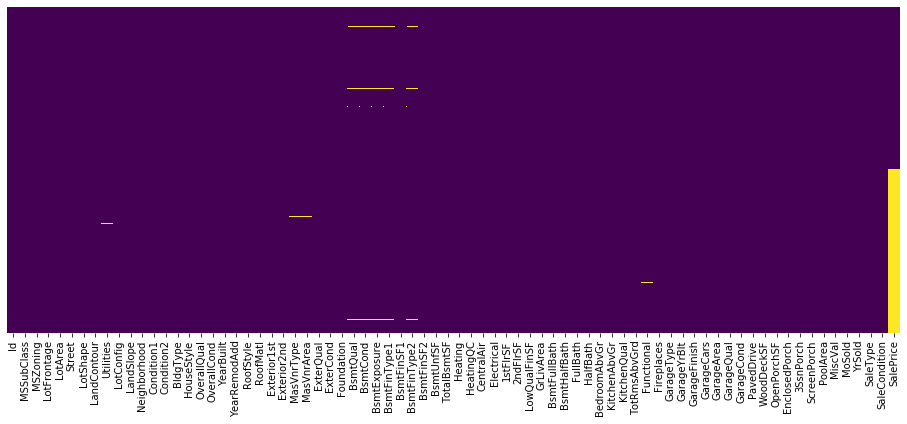

In [329]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [330]:
df['BsmtFinSF1'].value_counts()

0.0       929
24.0       27
16.0       14
300.0       9
288.0       8
         ... 
1022.0      1
939.0       1
1124.0      1
1619.0      1
1106.0      1
Name: BsmtFinSF1, Length: 991, dtype: int64

Dropping the remaining incomplete rows because of missing values about the basement and masonry veneer, 1412 rows remain

In [331]:
y=df['SalePrice']
y.dropna(inplace=True)
df.drop('SalePrice', axis=1, inplace=True)
df.fillna(method='backfill', inplace=True)


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

Getting dummies for categorical data:
- MSZoning: The general zoning classification
- Street: Type of road access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinType2: Quality of second finished area (if present)
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- KitchenQual: Kitchen quality
- Functional: Home functionality rating
- GarageType: Garage location
- GarageFinish: Interior finish of the garage
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [333]:
catcolnames=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical','KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [334]:
for col in catcolnames:
    col=pd.get_dummies(df[col], drop_first=True)
    df=pd.concat([df, col], axis=1)


In [335]:
df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical','KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], axis=1, inplace=True)

In [336]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0


In [337]:
#for col in catcolnames:
 #   col=pd.get_dummies(test[col], drop_first=True)
  #  test=pd.concat([test, col], axis=1) 
    
#test.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical','KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], axis=1, inplace=True)    


In [338]:
result=pd.DataFrame()
result['Id']=df[df['Id']>=1461]['Id']
test=df[df['Id']>=1461].drop(['Id'], axis=1)
X=df[df['Id']<1461].drop(['Id'], axis=1)

In [339]:
test.shape

(1459, 236)

In [340]:
X.shape

(1460, 236)

Building the Linear Regression model:

In [341]:
from sklearn.linear_model import LinearRegression

In [342]:
lm=LinearRegression()

In [343]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [344]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient']).transpose()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
Coefficient,-28.197254,38.008987,0.747549,6745.859629,5745.363117,332.66637,92.414727,19.632633,15.653605,6.603121,...,5105.300305,1207.342893,22296.720909,7275.372273,-14.497915,9270.049564,3376.303311,-561.149053,5679.719443,-1850.906756


Predictions:

In [345]:
predictions=lm.predict(test)

In [346]:
predictions

array([112376.37567903, 159835.45544959, 188773.443433  , ...,
       178785.77602983, 110225.92201463, 224259.11196541])

In [347]:
result['SalePrice']=predictions

In [348]:
result.head()

,Id,SalePrice
1460,1461,112376.375679
1461,1462,159835.455450
1462,1463,188773.443433
1463,1464,195277.089612
1464,1465,204558.150775


In [349]:
result.to_csv(r'/home/pitzm/Dokumentumok/Data Science/Kaggle/AdvancedRegression/resultlm.csv',index=False)

In [350]:
result.drop('SalePrice', axis=1)

,Id
1460,1461
1461,1462
1462,1463
1463,1464
1464,1465
...,...
2914,2915
2915,2916
2916,2917
2917,2918


Decision Tree model:

In [351]:
from sklearn.tree import DecisionTreeRegressor

In [352]:
dt=DecisionTreeRegressor()

In [353]:
dt.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [354]:
predictions=dt.predict(test)

In [355]:
predictions

array([129000., 164900., 204000., ..., 145000., 108000., 219500.])

In [356]:
result['SalePrice']=predictions

In [357]:
result.head()

,Id,SalePrice
1460,1461,129000.0
1461,1462,164900.0
1462,1463,204000.0
1463,1464,179900.0
1464,1465,220000.0


In [358]:
result.to_csv(r'/home/pitzm/Dokumentumok/Data Science/Kaggle/AdvancedRegression/resultdt.csv',index=False)

In [359]:
result.drop('SalePrice', axis=1, inplace=True)

Random Forest

In [360]:
from sklearn.ensemble import RandomForestRegressor

In [361]:
rf=RandomForestRegressor(n_estimators=200)

In [362]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [363]:
predictions=rf.predict(test)

In [364]:
predictions

array([129932.43 , 153985.11 , 180546.57 , ..., 153362.565, 115464.5  ,
       224704.5  ])

In [365]:
result['SalePrice']=predictions

In [366]:
result.head()

,Id,SalePrice
1460,1461,129932.43
1461,1462,153985.11
1462,1463,180546.57
1463,1464,188395.89
1464,1465,199662.71


In [367]:
result.to_csv(r'/home/pitzm/Dokumentumok/Data Science/Kaggle/AdvancedRegression/resultrf.csv',index=False)

In [368]:
result.drop('SalePrice', axis=1, inplace=True)

Support Vector Machines

In [369]:
from sklearn.svm import SVR

In [370]:
sv=SVR()

In [371]:
sv.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [372]:
predictions=sv.predict(test)

In [373]:
predictions

array([163010.55508961, 163028.44830583, 163041.11188247, ...,
       163087.76193684, 162992.87050347, 162991.0261905 ])

In [374]:
result['SalePrice']=predictions

In [375]:
result.head()

,Id,SalePrice
1460,1461,163010.555090
1461,1462,163028.448306
1462,1463,163041.111882
1463,1464,162993.067189
1464,1465,162937.361889


In [376]:
result.to_csv(r'/home/pitzm/Dokumentumok/Data Science/Kaggle/AdvancedRegression/resultsv.csv',index=False)

In [377]:
result.drop('SalePrice', axis=1, inplace=True)

Grid search:

In [378]:
#from sklearn.model_selection import GridSearchCV

In [379]:
#param_grid={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01, 0.001,0.0001]}

In [380]:
#grid=GridSearchCV(SVR(), param_grid, verbose=3)

In [381]:
#grid.fit(X,y)

In [382]:
#grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
#grid.best_estimator_

In [ ]:
#predictions=grid.predict(test)

In [ ]:
#result['SalePrice']=predictions

In [ ]:
#result.head(10)

In [ ]:
#result.to_csv(r'/home/pitzm/Dokumentumok/Data Science/Kaggle/AdvancedRegression/resultgrid.csv',index=False)

In [383]:
#result.drop('SalePrice', axis=1, inplace=True)

KeyError: "['SalePrice'] not found in axis"

Neural Network:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X1=X

In [ ]:
test1=test

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X1=scaler.fit_transform(X1)

In [ ]:
X1.shape

In [ ]:
X1

In [ ]:
test1=scaler.transform(test1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [406]:
nn=Sequential()

nn.add(Dense(236,activation='relu'))
nn.add(Dense(150,activation='relu'))
nn.add(Dense(150,activation='relu'))
nn.add(Dense(1))

nn.compile(optimizer='adam', loss='mse')

In [407]:
from tensorflow.keras.callbacks import EarlyStopping

In [408]:
early_stop=EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10)

In [411]:
nn.fit(x=X1, y=y, batch_size=100, epochs=8000, callbacks=[early_stop])

Epoch 1/8000
15/15 [==============================] - 0s 4ms/step - loss: 39037124608.0000
Epoch 2/8000
15/15 [==============================] - 0s 4ms/step - loss: 39009984512.0000
Epoch 3/8000
15/15 [==============================] - 0s 5ms/step - loss: 38845698048.0000
Epoch 4/8000
15/15 [==============================] - 0s 5ms/step - loss: 38213586944.0000
Epoch 5/8000
15/15 [==============================] - 0s 5ms/step - loss: 36421832704.0000
Epoch 6/8000
15/15 [==============================] - 0s 4ms/step - loss: 32385507328.0000
Epoch 7/8000
15/15 [==============================] - 0s 6ms/step - loss: 25255374848.0000
Epoch 8/8000
15/15 [==============================] - 0s 4ms/step - loss: 15524346880.0000
Epoch 9/8000
15/15 [==============================] - 0s 5ms/step - loss: 7719768576.0000
Epoch 10/8000
15/15 [==============================] - 0s 4ms/step - loss: 5463876608.0000
Epoch 11/8000
15/15 [==============================] - 0s 5ms/step - loss: 5152099840.0000


15/15 [==============================] - 0s 5ms/step - loss: 837749184.0000
Epoch 92/8000
15/15 [==============================] - 0s 5ms/step - loss: 831137600.0000
Epoch 93/8000
15/15 [==============================] - 0s 4ms/step - loss: 822300928.0000
Epoch 94/8000
15/15 [==============================] - 0s 4ms/step - loss: 819264128.0000
Epoch 95/8000
15/15 [==============================] - 0s 4ms/step - loss: 813047360.0000
Epoch 96/8000
15/15 [==============================] - 0s 4ms/step - loss: 811085312.0000
Epoch 97/8000
15/15 [==============================] - 0s 4ms/step - loss: 802585728.0000
Epoch 98/8000
15/15 [==============================] - 0s 4ms/step - loss: 798807168.0000
Epoch 99/8000
15/15 [==============================] - 0s 5ms/step - loss: 794629824.0000
Epoch 100/8000
15/15 [==============================] - 0s 7ms/step - loss: 790639680.0000
Epoch 101/8000
15/15 [==============================] - 0s 6ms/step - loss: 784148032.0000
Epoch 102/8000
15/15 [

15/15 [==============================] - 0s 4ms/step - loss: 578458624.0000
Epoch 182/8000
15/15 [==============================] - 0s 4ms/step - loss: 576069312.0000
Epoch 183/8000
15/15 [==============================] - 0s 5ms/step - loss: 574723968.0000
Epoch 184/8000
15/15 [==============================] - 0s 6ms/step - loss: 574455040.0000
Epoch 185/8000
15/15 [==============================] - 0s 5ms/step - loss: 572850432.0000
Epoch 186/8000
15/15 [==============================] - 0s 4ms/step - loss: 580967424.0000
Epoch 187/8000
15/15 [==============================] - 0s 5ms/step - loss: 575236736.0000
Epoch 188/8000
15/15 [==============================] - 0s 5ms/step - loss: 572265216.0000
Epoch 189/8000
15/15 [==============================] - 0s 4ms/step - loss: 580287936.0000
Epoch 190/8000
15/15 [==============================] - 0s 4ms/step - loss: 568631296.0000
Epoch 191/8000
15/15 [==============================] - 0s 4ms/step - loss: 566548672.0000
Epoch 192/8000

15/15 [==============================] - 0s 8ms/step - loss: 434490880.0000
Epoch 272/8000
15/15 [==============================] - 0s 6ms/step - loss: 428373184.0000
Epoch 273/8000
15/15 [==============================] - 0s 8ms/step - loss: 435402272.0000
Epoch 274/8000
15/15 [==============================] - 0s 6ms/step - loss: 427681376.0000
Epoch 275/8000
15/15 [==============================] - 0s 4ms/step - loss: 425581184.0000
Epoch 276/8000
15/15 [==============================] - 0s 5ms/step - loss: 427352224.0000
Epoch 277/8000
15/15 [==============================] - 0s 5ms/step - loss: 426742784.0000
Epoch 278/8000
15/15 [==============================] - 0s 5ms/step - loss: 418925024.0000
Epoch 279/8000
15/15 [==============================] - 0s 4ms/step - loss: 416124096.0000
Epoch 280/8000
15/15 [==============================] - 0s 4ms/step - loss: 414056032.0000
Epoch 281/8000
15/15 [==============================] - 0s 4ms/step - loss: 426556544.0000
Epoch 282/8000

15/15 [==============================] - 0s 6ms/step - loss: 311128640.0000
Epoch 362/8000
15/15 [==============================] - 0s 5ms/step - loss: 309247136.0000
Epoch 363/8000
15/15 [==============================] - 0s 6ms/step - loss: 310130208.0000
Epoch 364/8000
15/15 [==============================] - 0s 7ms/step - loss: 308553824.0000
Epoch 365/8000
15/15 [==============================] - 0s 5ms/step - loss: 307472640.0000
Epoch 366/8000
15/15 [==============================] - 0s 4ms/step - loss: 305539968.0000
Epoch 367/8000
15/15 [==============================] - 0s 5ms/step - loss: 306165536.0000
Epoch 368/8000
15/15 [==============================] - 0s 5ms/step - loss: 309768928.0000
Epoch 369/8000
15/15 [==============================] - 0s 4ms/step - loss: 307469984.0000
Epoch 370/8000
15/15 [==============================] - 0s 5ms/step - loss: 304039488.0000
Epoch 371/8000
15/15 [==============================] - 0s 6ms/step - loss: 310944896.0000
Epoch 372/8000

15/15 [==============================] - 0s 7ms/step - loss: 232242864.0000
Epoch 452/8000
15/15 [==============================] - 0s 5ms/step - loss: 232194432.0000
Epoch 453/8000
15/15 [==============================] - 0s 5ms/step - loss: 230948912.0000
Epoch 454/8000
15/15 [==============================] - 0s 5ms/step - loss: 229827664.0000
Epoch 455/8000
15/15 [==============================] - 0s 6ms/step - loss: 230776176.0000
Epoch 456/8000
15/15 [==============================] - 0s 5ms/step - loss: 228203392.0000
Epoch 457/8000
15/15 [==============================] - 0s 5ms/step - loss: 233172352.0000
Epoch 458/8000
15/15 [==============================] - 0s 6ms/step - loss: 230735360.0000
Epoch 459/8000
15/15 [==============================] - 0s 6ms/step - loss: 229162320.0000
Epoch 460/8000
15/15 [==============================] - 0s 6ms/step - loss: 226676448.0000
Epoch 461/8000
15/15 [==============================] - 0s 6ms/step - loss: 230122416.0000
Epoch 462/8000

15/15 [==============================] - 0s 6ms/step - loss: 176160944.0000
Epoch 542/8000
15/15 [==============================] - 0s 5ms/step - loss: 174931872.0000
Epoch 543/8000
15/15 [==============================] - 0s 5ms/step - loss: 177703056.0000
Epoch 544/8000
15/15 [==============================] - 0s 5ms/step - loss: 178527296.0000
Epoch 545/8000
15/15 [==============================] - 0s 4ms/step - loss: 176512240.0000
Epoch 546/8000
15/15 [==============================] - 0s 4ms/step - loss: 172850400.0000
Epoch 547/8000
15/15 [==============================] - 0s 4ms/step - loss: 182862176.0000
Epoch 548/8000
15/15 [==============================] - 0s 4ms/step - loss: 172340368.0000
Epoch 549/8000
15/15 [==============================] - 0s 4ms/step - loss: 171126656.0000
Epoch 550/8000
15/15 [==============================] - 0s 4ms/step - loss: 170865344.0000
Epoch 551/8000
15/15 [==============================] - 0s 4ms/step - loss: 169507872.0000
Epoch 552/8000

15/15 [==============================] - 0s 4ms/step - loss: 134574672.0000
Epoch 632/8000
15/15 [==============================] - 0s 4ms/step - loss: 134536448.0000
Epoch 633/8000
15/15 [==============================] - 0s 5ms/step - loss: 133866616.0000
Epoch 634/8000
15/15 [==============================] - 0s 4ms/step - loss: 134387856.0000
Epoch 635/8000
15/15 [==============================] - 0s 4ms/step - loss: 133405072.0000
Epoch 636/8000
15/15 [==============================] - 0s 4ms/step - loss: 134630816.0000
Epoch 637/8000
15/15 [==============================] - 0s 4ms/step - loss: 131142096.0000
Epoch 638/8000
15/15 [==============================] - 0s 4ms/step - loss: 131849512.0000
Epoch 639/8000
15/15 [==============================] - 0s 4ms/step - loss: 132398408.0000
Epoch 640/8000
15/15 [==============================] - 0s 4ms/step - loss: 131520720.0000
Epoch 641/8000
15/15 [==============================] - 0s 4ms/step - loss: 130142176.0000
Epoch 642/8000

15/15 [==============================] - 0s 4ms/step - loss: 103497000.0000
Epoch 722/8000
15/15 [==============================] - 0s 4ms/step - loss: 105137320.0000
Epoch 723/8000
15/15 [==============================] - 0s 4ms/step - loss: 101100088.0000
Epoch 724/8000
15/15 [==============================] - 0s 4ms/step - loss: 100690688.0000
Epoch 725/8000
15/15 [==============================] - 0s 4ms/step - loss: 100137384.0000
Epoch 726/8000
15/15 [==============================] - 0s 4ms/step - loss: 100338784.0000
Epoch 727/8000
15/15 [==============================] - 0s 4ms/step - loss: 100821248.0000
Epoch 728/8000
15/15 [==============================] - 0s 4ms/step - loss: 101595856.0000
Epoch 729/8000
15/15 [==============================] - 0s 4ms/step - loss: 100642208.0000
Epoch 730/8000
15/15 [==============================] - 0s 3ms/step - loss: 107121544.0000
Epoch 731/8000
15/15 [==============================] - 0s 4ms/step - loss: 101338112.0000
Epoch 732/8000

15/15 [==============================] - 0s 4ms/step - loss: 79435896.0000
Epoch 812/8000
15/15 [==============================] - 0s 4ms/step - loss: 79744936.0000
Epoch 813/8000
15/15 [==============================] - 0s 5ms/step - loss: 80852272.0000
Epoch 814/8000
15/15 [==============================] - 0s 4ms/step - loss: 83097456.0000
Epoch 815/8000
15/15 [==============================] - 0s 4ms/step - loss: 78714456.0000
Epoch 816/8000
15/15 [==============================] - 0s 4ms/step - loss: 81453776.0000
Epoch 817/8000
15/15 [==============================] - 0s 3ms/step - loss: 78696080.0000
Epoch 818/8000
15/15 [==============================] - 0s 4ms/step - loss: 79435224.0000
Epoch 819/8000
15/15 [==============================] - 0s 4ms/step - loss: 80778672.0000
Epoch 820/8000
15/15 [==============================] - 0s 4ms/step - loss: 82308368.0000
Epoch 821/8000
15/15 [==============================] - 0s 4ms/step - loss: 81221296.0000
Epoch 822/8000
15/15 [===

In [412]:
losses=pd.DataFrame(nn.history.history)

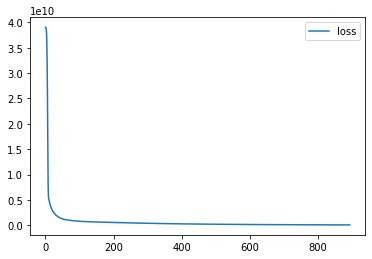

In [413]:
losses.plot()

In [414]:
predictions=nn.predict(test1)

In [415]:
result['SalePrice']=predictions

In [416]:
result.head()

,Id,SalePrice
1460,1461,147166.609375
1461,1462,174540.484375
1462,1463,177981.656250
1463,1464,208429.921875
1464,1465,173487.234375


In [417]:
result.to_csv(r'/home/pitzm/Dokumentumok/Data Science/Kaggle/AdvancedRegression/resultnn.csv',index=False)

In [418]:
result.drop('SalePrice', axis=1, inplace=True)